In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras_preprocessing import image
import numpy as np


In [2]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(224, 224),
    batch_size=batch_size,
    classes=['Tiretread_1.5mm', 'Tiretread_4mm', 'Tiretread_6mm', 'Tiretread_8mm'],
    class_mode='categorical'
)

Found 145 images belonging to 4 classes.


In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG16 model (excluding top layer and with specified input shape)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 'num_classes' should be replaced with the number of your classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
total_samples = train_generator.n
n_epochs = 10

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=int(total_samples / batch_size),
    epochs=n_epochs,
    verbose=1
)

Epoch 1/10
4/4 [==============================] - 38s 9s/step - loss: 1.3310 - accuracy: 0.6460
Epoch 2/10
4/4 [==============================] - 35s 8s/step - loss: 0.8019 - accuracy: 0.7788
Epoch 3/10
4/4 [==============================] - 39s 9s/step - loss: 0.5748 - accuracy: 0.7734
Epoch 4/10
4/4 [==============================] - 43s 10s/step - loss: 0.5215 - accuracy: 0.7891
Epoch 5/10
4/4 [==============================] - 36s 10s/step - loss: 0.3230 - accuracy: 0.8673
Epoch 6/10
4/4 [==============================] - 34s 8s/step - loss: 0.3616 - accuracy: 0.9027
Epoch 7/10
4/4 [==============================] - 47s 12s/step - loss: 0.2334 - accuracy: 0.9062
Epoch 8/10
4/4 [==============================] - 37s 10s/step - loss: 0.2103 - accuracy: 0.9469
Epoch 9/10
4/4 [==============================] - 42s 10s/step - loss: 0.2059 - accuracy: 0.9531
Epoch 10/10
4/4 [==============================] - 33s 9s/step - loss: 0.2140 - accuracy: 0.9381


In [7]:
history = model.history.history
accuray = history['accuracy'][-1]
loss = history['loss'][-1]

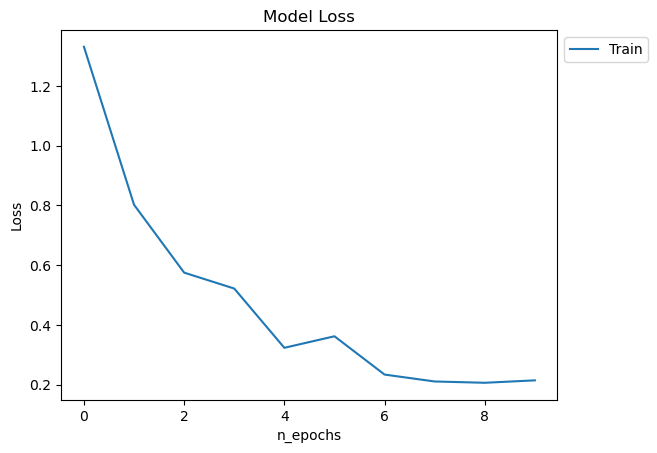

In [8]:
plt.plot(history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('n_epochs')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))

plt.show()

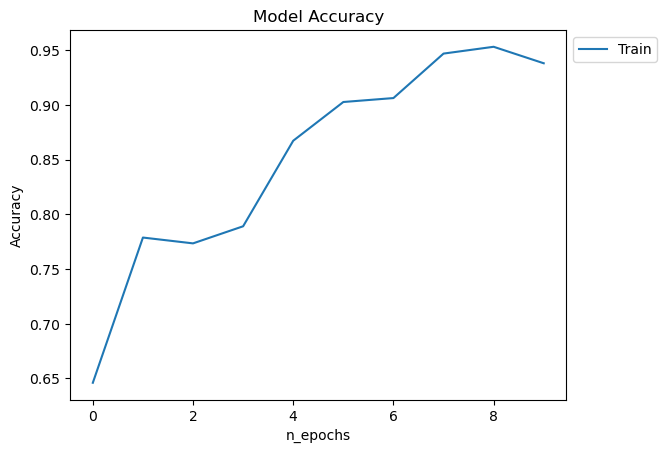

In [9]:
plt.plot(history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_epochs')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))

plt.show()

In [10]:
model.save('model_sample.h5')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
